# Activation Functions

## 🔹 What Happens Inside a Neuron?

When a neuron gets an input, it calculates something like:

$$
z = (\text{input}) \times (\text{weight}) + \text{bias}
$$

This number `z` might be **big**, **small**, **negative**, or **zero**.

The **activation function** then transforms that `z` value into something more meaningful — like a **yes (1)**, **no (0)**, or **maybe (between 0 and 1)**.

---

### 🔹 Examples of Activation Functions:

- **Sigmoid**  
  Turns any number into something between **0 and 1**.  
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$

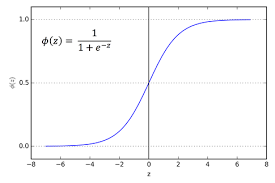

- **ReLU (Rectified Linear Unit)**  
  Turns anything **negative into 0**, and keeps **positive numbers the same**.  
  $$
  f(x) = \max(0, x)
  $$

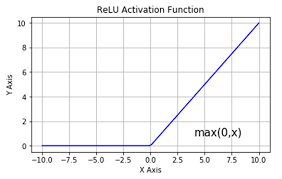

- **Tanh (Hyperbolic Tangent)**  
  Gives a range between **-1 and 1**  
  (like strong no to strong yes).  
  $$
  \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $$

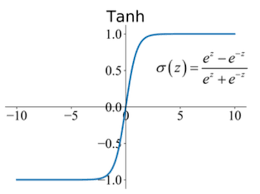

- **Softmax**  
  Takes a **list of values** and turns them into **probabilities that add up to 1**.  
  Useful for multi-class classification.  
  $$
  \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
  $$

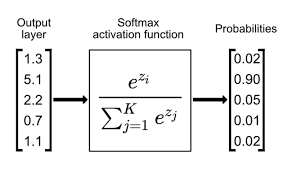
---

These activation functions help the neuron decide **how much signal to pass forward** in a neural network.


# Reccurent Neural Network

An RNN, or Recurrent Neural Network, is a type of neural network designed to handle sequences of data. Unlike regular neural networks (which treat all inputs independently), RNNs remember past information and use it to influence the current output.

**RNN Equation:**

```
h_t = tanh(W_xh * x_t + W_hh * h_{t-1} + b)
```

**Assumptions:**

- Input sequence: `x = [6, 7, 8, 6]`  (test marks)
- Initial memory: `h₀ = 0.0`
- Weights: `W_xh = 0.5`, `W_hh = 0.8`
- Bias: `b = 0.1`
- Activation: `tanh` (squashes between -1 and 1)

| Time (t) | Input \(x_t\) | Previous Memory \(h_{t-1}\) | Formula | Memory Output \(h_t\) |
|----------|----------------|-----------------------------|---------|------------------------|
| 1        | 6              | 0.0                         | `tanh(6*0.5 + 0*0.8 + 0.1)` = `tanh(3.1)` | **0.9959** |
| 2        | 7              | 0.9959                      | `tanh(7*0.5 + 0.9959*0.8 + 0.1)` = `tanh(4.397)` | **0.9997** |
| 3        | 8              | 0.9997                      | `tanh(8*0.5 + 0.9997*0.8 + 0.1)` = `tanh(4.9)`   | **0.9999** |
| 4        | 6              | 0.9999                      | `tanh(6*0.5 + 0.9999*0.8 + 0.1)` = `tanh(3.9)`   | **0.9992** |

### ✅ Final Memory State: `h₄ ≈ 0.9992`
This memory vector summarizes the pattern of marks and can be used for predicting the next mark or classifying performance.


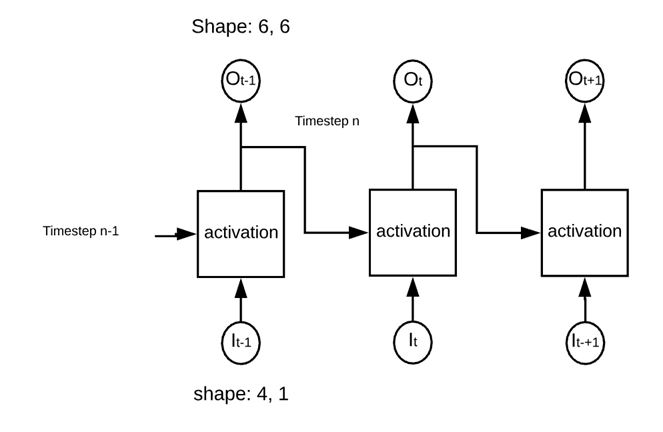

Gradient
$$
d/dx tanh(x) = 1 - tanh²(x)
$$

# Vanishing Gradient

| Time (t) | \( h_t \)  | Gradient \( 1 - h_t^2 \)          |
|----------|------------|-----------------------------------|
| 1        | 0.9959     | \( 1 - 0.9959^2 = 0.0082 \)       |
| 2        | 0.9997     | \( 1 - 0.9997^2 = 0.0006 \)       |
| 3        | 0.9999     | \( 1 - 0.9999^2 = 0.0002 \)       |
| 4        | 0.9992     | \( 1 - 0.9992^2 = 0.0016 \)       |


# Exploding Gradient

| Time (t) | \( h_t \) | Gradient \( 1 - h_t^2 \)         |
|----------|-----------|----------------------------------|
| 1        | 0.4       | \( 1 - 0.4^2 = 0.84 \)           |
| 2        | 0.3       | \( 1 - 0.3^2 = 0.91 \)           |
| 3        | 0.2       | \( 1 - 0.2^2 = 0.96 \)           |
| 4        | 0.1       | \( 1 - 0.1^2 = 0.99 \)           |


# 🧠 Vanishing and Exploding Gradients in RNNs

## 🔁 Background
In RNNs, training is done through **Backpropagation Through Time (BPTT)**. During this process, gradients are passed backward across time steps.

The gradient at each time step involves a product of derivatives:
\[
\frac{\partial L}{\partial W} \propto \prod_{t} \left( \frac{\partial h_t}{\partial h_{t-1}} \right)
\]

If this product becomes **too small** or **too large**, we encounter the vanishing or exploding gradient problem.

---

## 📉 Vanishing Gradient

### 🔍 What Happens
- Gradients **become very small** (close to 0).
- Early layers (or earlier time steps) **learn very slowly or not at all**.
- Long-term dependencies are **not captured**.

---

## 💥 Exploding Gradient

### 🔍 What Happens
- Gradients **grow rapidly**.
- Leads to **unstable training**, large weight updates, or NaNs.
- Model **fails to converge**.


---

## 🎯 Comparison Table

| Problem              | What Happens                     | Why It Happens                         | Result                                |
|----------------------|----------------------------------|----------------------------------------|---------------------------------------|
| **Vanishing Gradient** | Gradients shrink to ~0            | Multiplier < 1 (e.g., tanh near ±1)    | Long-term memory lost, slow learning  |
| **Exploding Gradient** | Gradients grow exponentially      | Multiplier > 1                         | Unstable weights, NaNs, divergence    |

---

## 🛠️ Solutions

| Problem              | Solutions                                      |
|----------------------|------------------------------------------------|
| Vanishing Gradient   | Use **LSTM/GRU**, ReLU activation, Xavier init |
| Exploding Gradient   | Use **gradient clipping**, normalization       |



# Sample Code

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ananthr1_weather_prediction_path = kagglehub.dataset_download('ananthr1/weather-prediction')

print('Data source import complete.')


Data source import complete.


In [ ]:
ananthr1_weather_prediction_path

'/kaggle/input/weather-prediction'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/ananthr1/weather-prediction/versions/1/seattle-weather.csv')

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [ ]:
len(training_set)

1461

In [ ]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [ ]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [ ]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Initializing the RNN model
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding more RNN layers with Dropout regularization
regressor.add(SimpleRNN(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [ ]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 229.6184 - val_loss: 259.3128
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 114.3679 - val_loss: 199.4206
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 94.1524 - val_loss: 164.7278
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.3363 - val_loss: 141.6517
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.0045 - val_loss: 121.4474
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.8143 - val_loss: 105.0951
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 50.2737 - val_loss: 91.1588
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 41.9024 - val_loss: 79.8894
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 34.8130 - val_loss: 69.9615
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 33.8769 - val_loss: 61.9192
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.0374 - val_loss: 54.5915
Epoch 12/100
25/25 ━━━

In [ ]:
his = pd.DataFrame(history.history)

In [ ]:
his.head()

,loss,val_loss
0,183.476761,259.312836
1,110.312019,199.420624
2,86.185501,164.727798
3,71.147469,141.651657
4,61.235264,121.447380


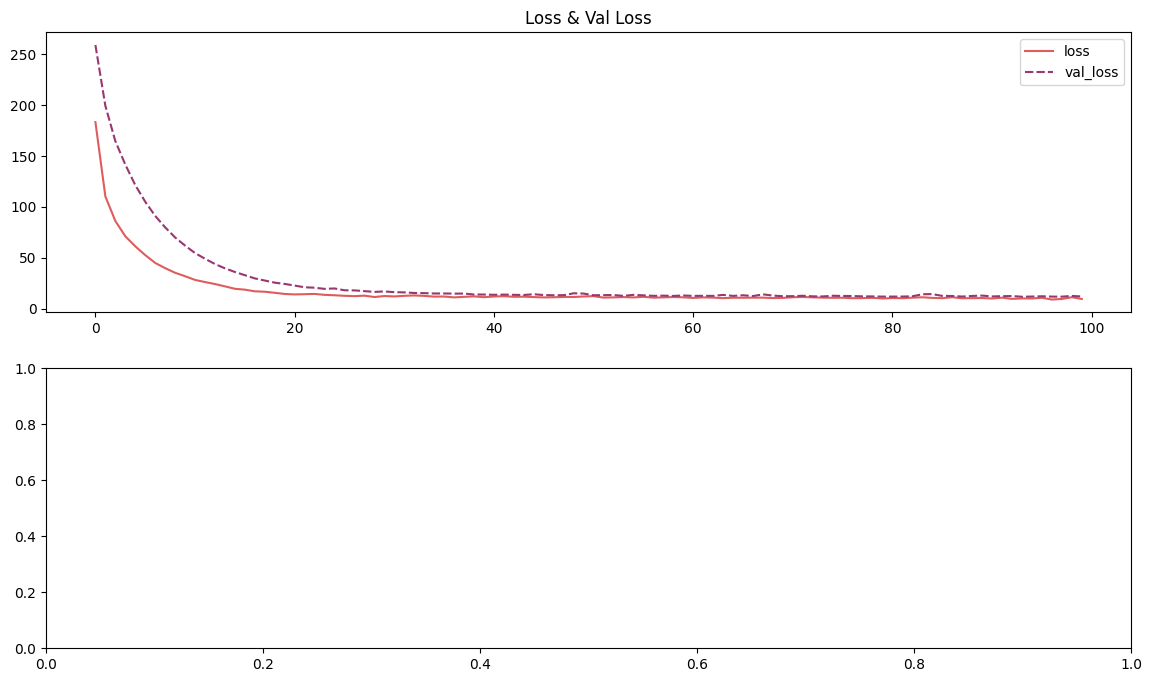

In [ ]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");



In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


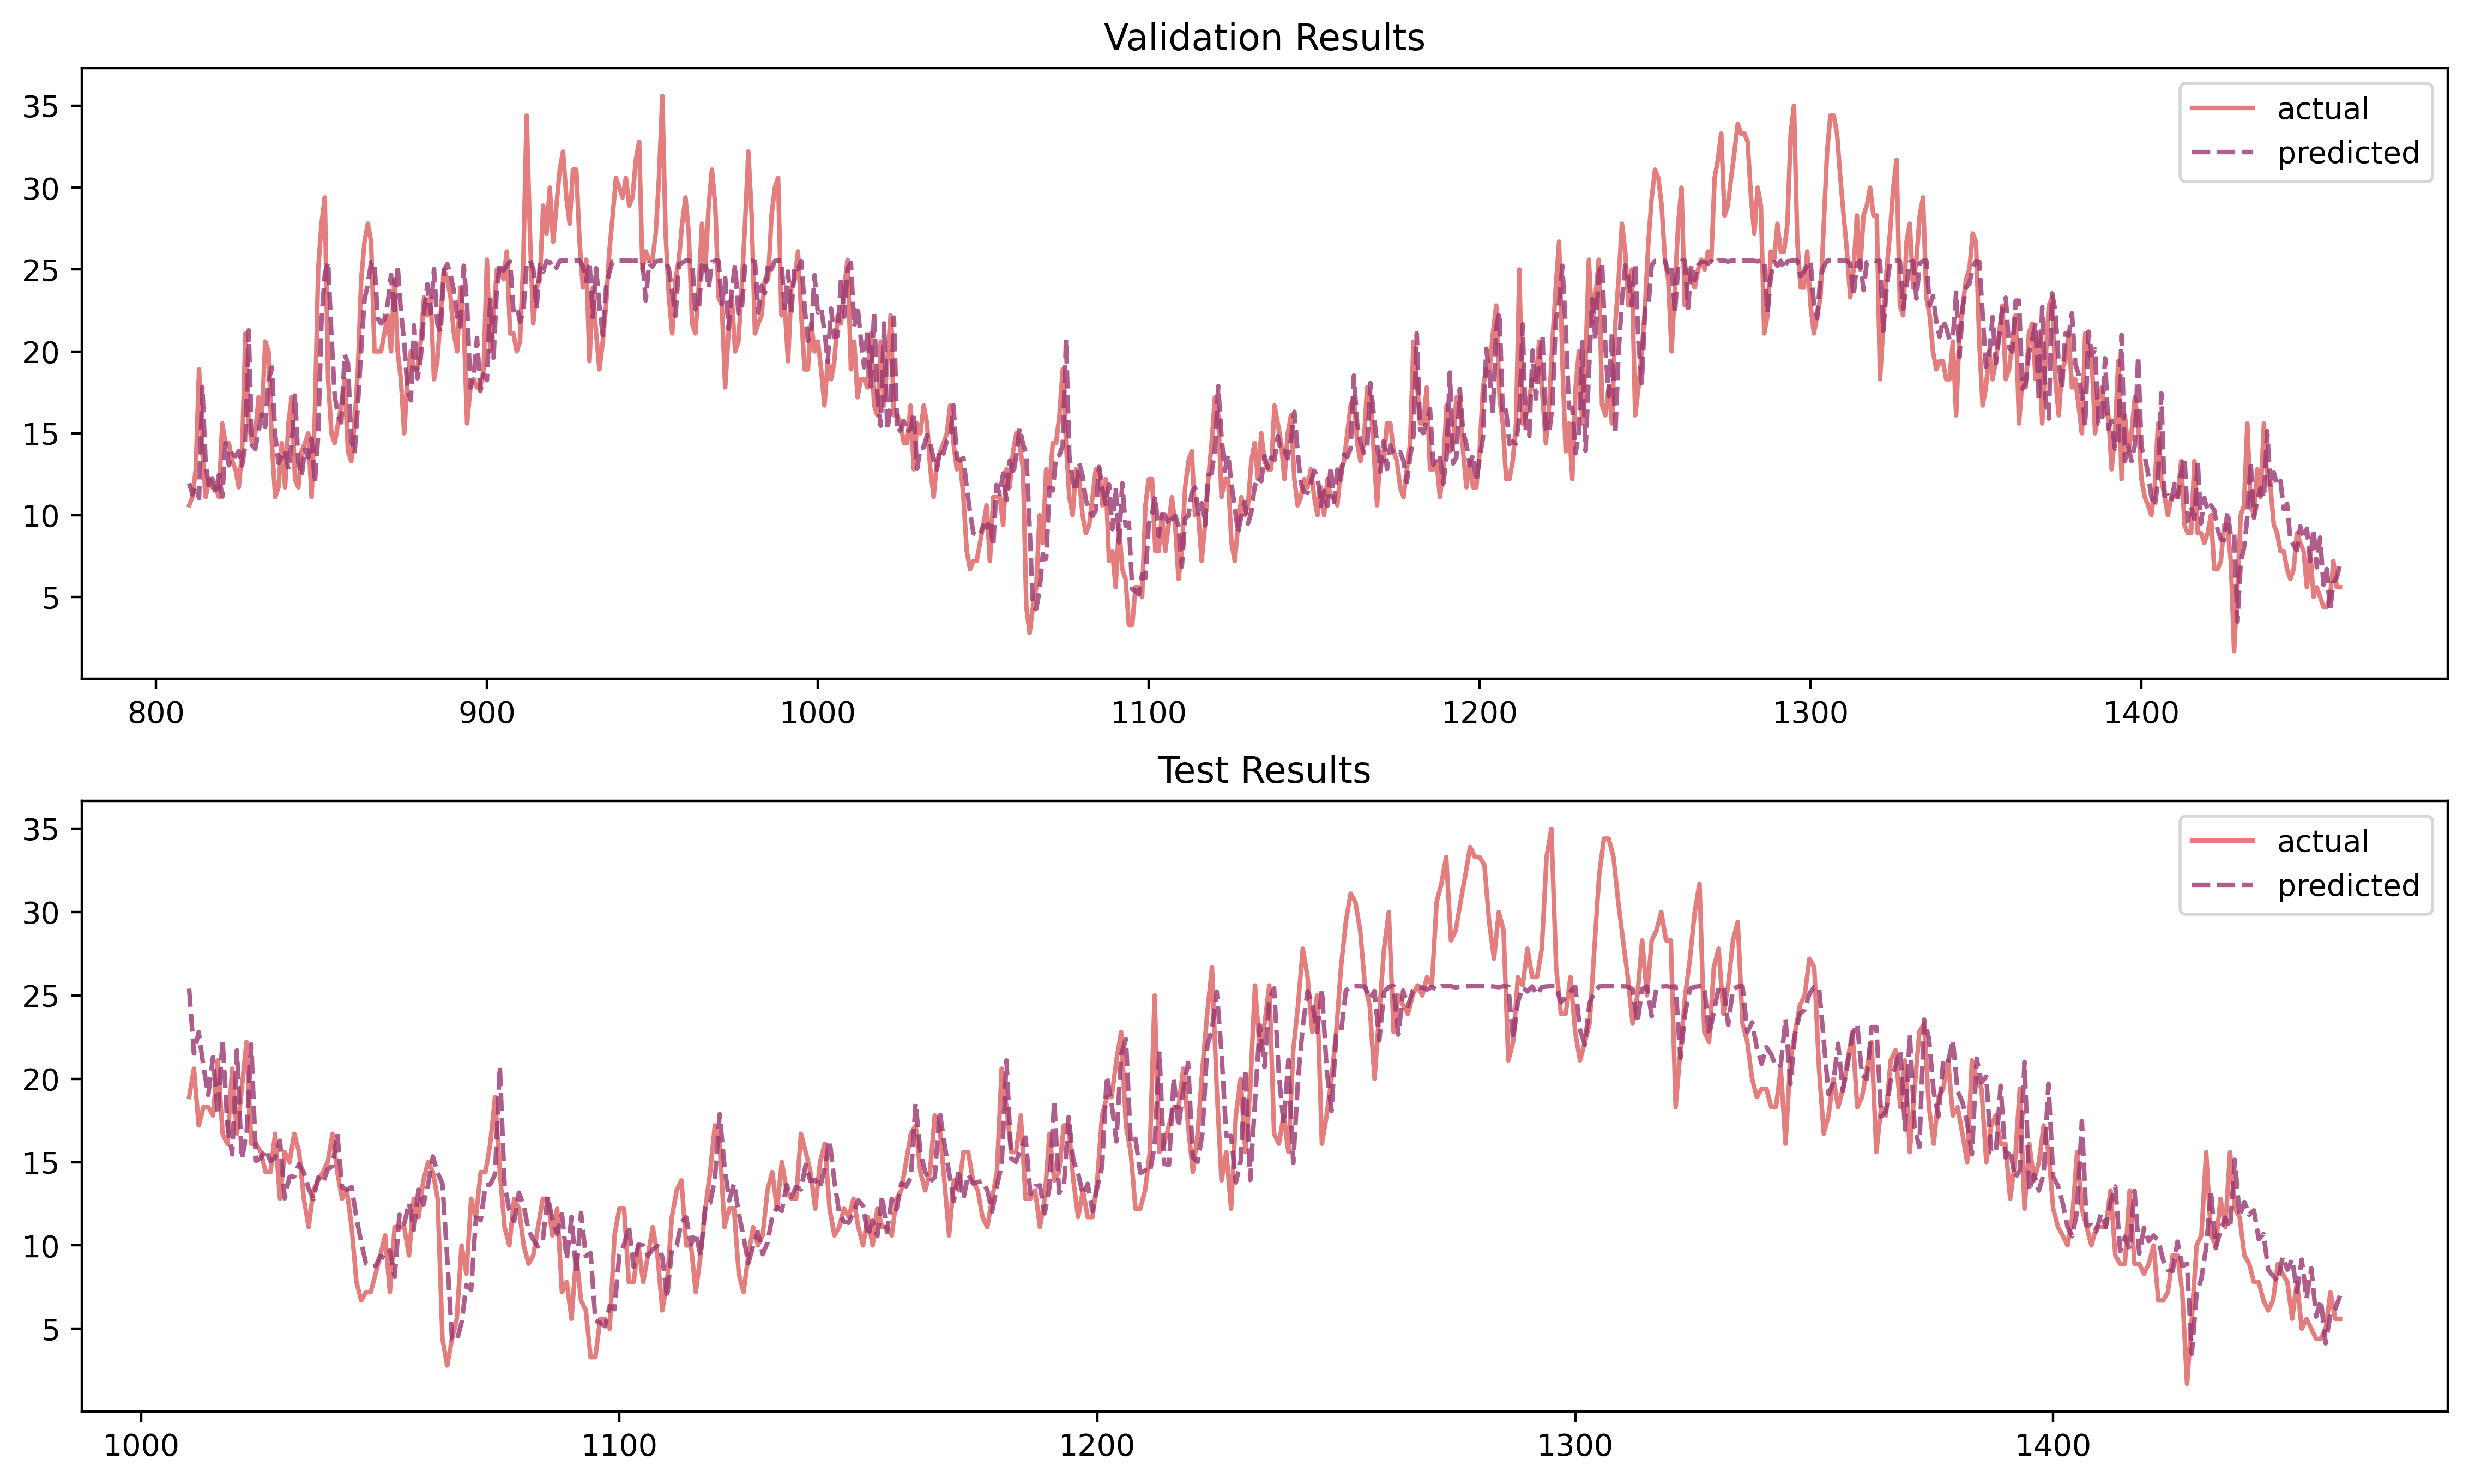

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);